## Interesting graphic 2: Accidents per road segment for a region of England  

This notebook explores the UK road network dataset that I will use for this project. Eventually, each accident in the accident database will be associated with a road segment. In this expoloratory notebook the road segments are not of equal length, but I would aim to use GIS software such as QGIS to generate a new road database whose segments are of equal length.

In [38]:
import geopandas as gp
import pandas as pd
import glob
import matplotlib.pylab as plt
import numpy as np
import colorcet as cc

#### Load all the RoadLink shapefiles as geodataframes and concatenate

In [2]:
shapefiles = glob.glob('./oproad_essh_gb/data/*RoadLink.shp')
shapefiles_df = []
for shapefile in shapefiles:
    road_example = gp.read_file(shapefile)
    shapefiles_df.append(road_example)

all_shapefiles = pd.concat(shapefiles_df)

In [3]:
all_shapefiles.head()

,fictitious,identifier,class,roadNumber,name1,name1_lang,name2,name2_lang,formOfWay,length,primary,trunkRoad,loop,startNode,endNode,structure,nameTOID,numberTOID,function,geometry
0,false,10999BD3-D4BC-4F12-A283-6D0187831AB6,B Road,B9087,None,None,None,None,Single Carriageway,237,false,false,false,D3CFE319-00BC-4F5A-B4F5-823F95CEBC20,9460E004-6515-49E9-84E3-2A78FFD87CC4,None,None,osgb4000000003210684,B Road,"LINESTRING Z (464433 1213478 0, 464462 1213473..."
1,false,D1E020FB-167E-4D9E-A8E7-1FD17C6DB296,B Road,B9087,None,None,None,None,Single Carriageway,394,false,false,false,9460E004-6515-49E9-84E3-2A78FFD87CC4,475728B6-D934-4C9F-BE7E-15B92A5E7A56,None,None,osgb4000000003210684,B Road,"LINESTRING Z (464662 1213484 0, 464722 1213539..."
2,false,1A4553EE-B3A2-43CC-BAAF-D47839631B98,Unknown,None,None,None,None,None,Single Carriageway,649,false,false,false,7E9D3532-9106-424F-A363-DFC10C873905,5B6BD898-E782-44F0-B500-DB6B54FFB154,None,None,None,Minor Road,"LINESTRING Z (463833 1213523 0, 463772.03 1213..."
3,false,1FD4DD6D-B2E6-4EA2-99FC-ECB5B229A2D6,Unknown,None,None,None,None,None,Single Carriageway,686,false,false,false,7E9D3532-9106-424F-A363-DFC10C873905,54CE231E-2CEA-4FC3-AF85-4B5C2F1EF157,None,None,None,Minor Road,"LINESTRING Z (463833 1213523 0, 463814 1213584..."
4,false,EAD3EE3B-9C52-445F-8574-51045B115B9E,Unknown,None,None,None,None,None,Single Carriageway,107,false,false,false,475728B6-D934-4C9F-BE7E-15B92A5E7A56,016B2D0E-899B-4D78-A5E1-2757E951FAAC,None,None,None,Restricted Local Access Road,"LINESTRING Z (464857.11 1213817.39 0, 464902.9..."


#### Take a look at the types of roads in this database

In [4]:
all_shapefiles['function'].unique()

array(['B Road', 'Minor Road', 'Restricted Local Access Road',
       'Local Road', 'Local Access Road', 'A Road',
       'Secondary Access Road', 'Motorway'], dtype=object)

In [13]:
all_motorways = all_shapefiles[all_shapefiles['function']=='Motorway']
all_Aroads = all_shapefiles[all_shapefiles['function']=='A Road']

#### Load all the accident files from 2010 to 2017

In [6]:
accidents_location = "/Users/rmartinshort/Documents/Datasets/UK_traffic_accidents/"
accidents_2017 = pd.read_csv(accidents_location+"DfTRoadSafety_Accidents_2017.csv")
accidents_2017 = pd.read_csv(accidents_location+"DfTRoadSafety_Accidents_2017.csv")
accidents_2016 = pd.read_csv(accidents_location+"DfTRoadSafety_Accidents_2016.csv")
accidents_2015 = pd.read_csv(accidents_location+"DfTRoadSafety_Accidents_2015.csv")
accidents_2014 = pd.read_csv(accidents_location+"DfTRoadSafety_Accidents_2014.csv")
accidents_2013 = pd.read_csv(accidents_location+"DfTRoadSafety_Accidents_2013.csv")
accidents_2012 = pd.read_csv(accidents_location+"DfTRoadSafety_Accidents_2012.csv")
accidents_2011 = pd.read_csv(accidents_location+"DfTRoadSafety_Accidents_2011.csv")
accidents_2010 = pd.read_csv(accidents_location+"DfTRoadSafety_Accidents_2010.csv")
all_accidents_since_2010 = pd.concat([accidents_2017,accidents_2016,accidents_2015,accidents_2014,accidents_2013
            ,accidents_2012,accidents_2011,accidents_2010])

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
all_accidents_since_2010.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

#### Get only the accidents that occured on a particular road type (motorways in this case)

In [25]:
all_accidients_motorways = all_accidents_since_2010[all_accidents_since_2010['1st_Road_Class']==1]

#### Load the county boundaries

In [ ]:
county_boundaries = gp.read_file("/Users/rmartinshort/Documents/Datasets/UK_census/england_ct_2011.shp")

#### Plot a map of the london region showing all motorways, A roads, county boundaries and accidents on motorways

(490000, 560000)

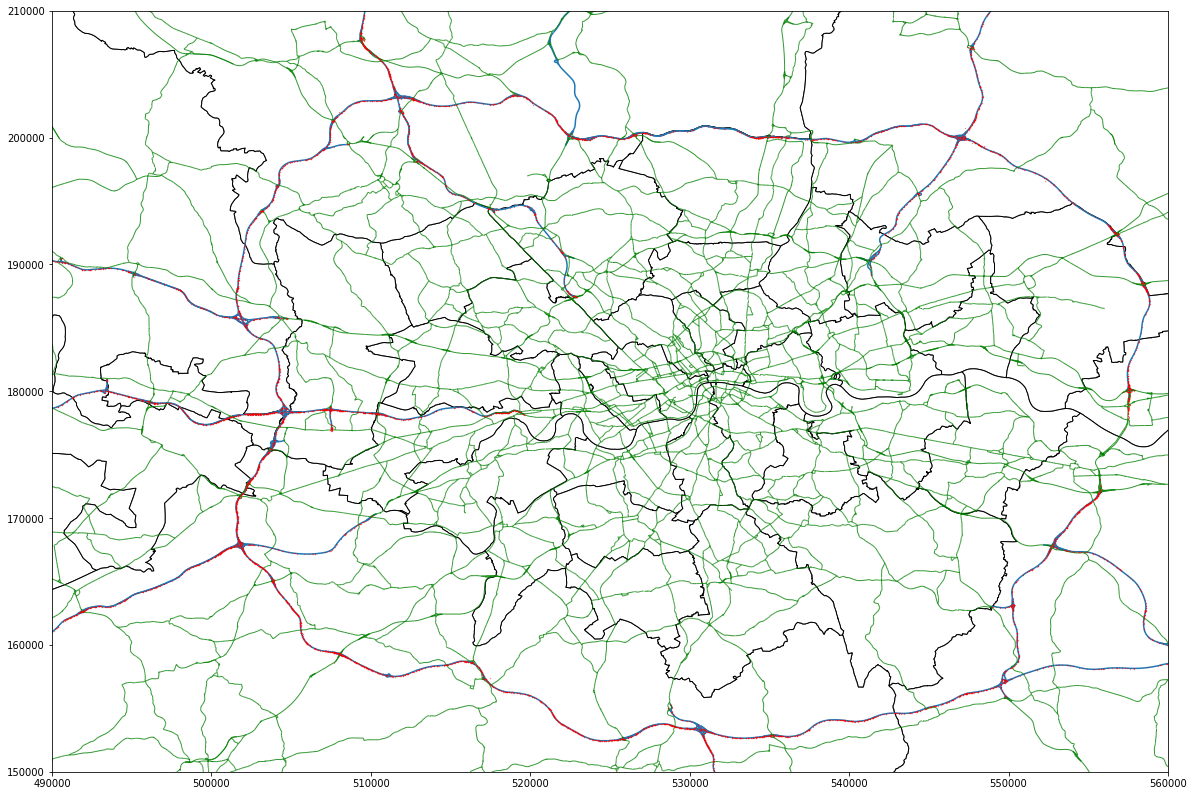

In [50]:
fig, ax = plt.subplots(1, figsize=(20, 14))
county_boundaries.plot(ax=ax,alpha=1,facecolor='white',edgecolor='black')
all_motorways.plot(ax=ax)
all_Aroads.plot(ax=ax,alpha=0.8,linewidth=1,edgecolor='green',color='green')
ax.plot(all_accidients_motorways['Location_Easting_OSGR'],all_accidients_motorways['Location_Northing_OSGR'],'r.',markersize=0.4)
ax.set_ylim((150000, 210000))
ax.set_xlim((490000, 560000))
#ax.axis('off')

In [12]:
from shapely.geometry import Point, LineString, MultiLineString

In [13]:
eastings = all_accidents_since_2010['Location_Easting_OSGR']
northings = all_accidents_since_2010['Location_Northing_OSGR']
poly_points = []
for easting, northing in zip(eastings,northings):
    poly_points.append(Point(easting,northing))

In [14]:
all_accidents_since_2010['poly_points'] = poly_points

In [58]:
all_accidents_since_2010.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

## Accidents per road segment  

Here we demonstrate a test of a method to find the number of accidents per road segment. We load just one of th UK road files, determine the boundaries of the region using the node files and then count the number of accidents within some small distance of each of the line segments in the RoadLinK file. One issue with this approach is that the road segments are of different lengths. When actually building my training set, I will need to ensure that each segment is the same length. Segment splitting can be done using GIS software scuh as ARCGIS or QGIS.   


The present exploration is just a proof of concept to test that my idea about summing the accidents per road segment will work

#### Here we just look at the road network in southeast England. This is a densely populated area so likely represents one of the most computationally expensive datasets to process

In [2]:
nodefile = gp.read_file('./oproad_essh_gb/data/TR_RoadNode.shp')
linesfile = gp.read_file('./oproad_essh_gb/data/TR_RoadLink.shp')

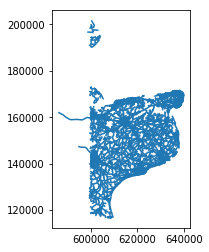

In [3]:
linesfile.plot()

In [4]:
nodefile.head()

,identifier,formOfNode,geometry
0,8AE90010-5EF8-4E31-ABB9-08110A4B212C,junction,POINT Z (639507.54 167628.08 0)
1,3B80E0E0-5F51-476F-8D2D-8944EC4433F2,junction,POINT Z (639638.9300000001 167682.94 0)
2,65238203-032F-4FE0-AEA1-46D727F9D84A,junction,POINT Z (639663.54 167697.57 0)
3,29BB7F2D-8D1A-42B5-AFC7-92FA0F539854,junction,POINT Z (639668 167700 0)
4,4542E933-8F27-4530-99EC-BAAAFF93AB37,junction,POINT Z (639744 167717 0)


#### Get the boundaries of the region

In [7]:
bounds = nodefile['geometry'].bounds
minx = np.min(bounds['minx'])
maxx = np.max(bounds['maxx'])
miny = np.min(bounds['miny'])
maxy = np.max(bounds['maxy'])
print(minx,maxx,miny,maxy)

600000.9 640140.0 116620.84 199895.95


#### Cut out all the accidents within those boundaries

In [15]:
accidents_test = all_accidents_since_2010[(all_accidents_since_2010['Location_Easting_OSGR']>minx) & (
    all_accidents_since_2010['Location_Easting_OSGR']<maxx) & (
    all_accidents_since_2010['Location_Northing_OSGR']>miny) & 
    (all_accidents_since_2010['Location_Northing_OSGR']<maxy)]


In [16]:
len(accidents_test)

12779

In [17]:
len(linesfile['geometry'])

33024

#### Sum the accidents per road segment  

Note that this takes quite a while. It could easily be sped up with parrallelization 

In [20]:
%%time
roads = linesfile['geometry']
lr = len(roads)
poly_points = accidents_test['poly_points']
segment_accidents = np.zeros(lr)
for i in range(lr):
    segment = roads[i]
    for accident in poly_points:
        if (segment.distance(accident)) < 5:
            segment_accidents[i] += 1

CPU times: user 50min 51s, sys: 9.01 s, total: 51min
Wall time: 51min 17s


The sum of the accident segments vector is a little less than the sum of the accidents in the accidents_test dataframe. This is possibly because some accidents occured more than 5 meters from the roadway, their coordiantes were incorrectly reported, or the road network was different when the accidents occured. So long as this difference is small I don't think it will be a problem in the model building

In [21]:
np.sum(segment_accidents)

11747.0

#### Plot a map of accidents per segment

In [22]:
linesfile['accidents_per_segment'] = segment_accidents

In [33]:
no_accidents = linesfile[linesfile['accidents_per_segment'] == 0]
accidents = linesfile[linesfile['accidents_per_segment'] > 0] 

No handles with labels found to put in legend.


Text(0,1,'Accidents per segment')

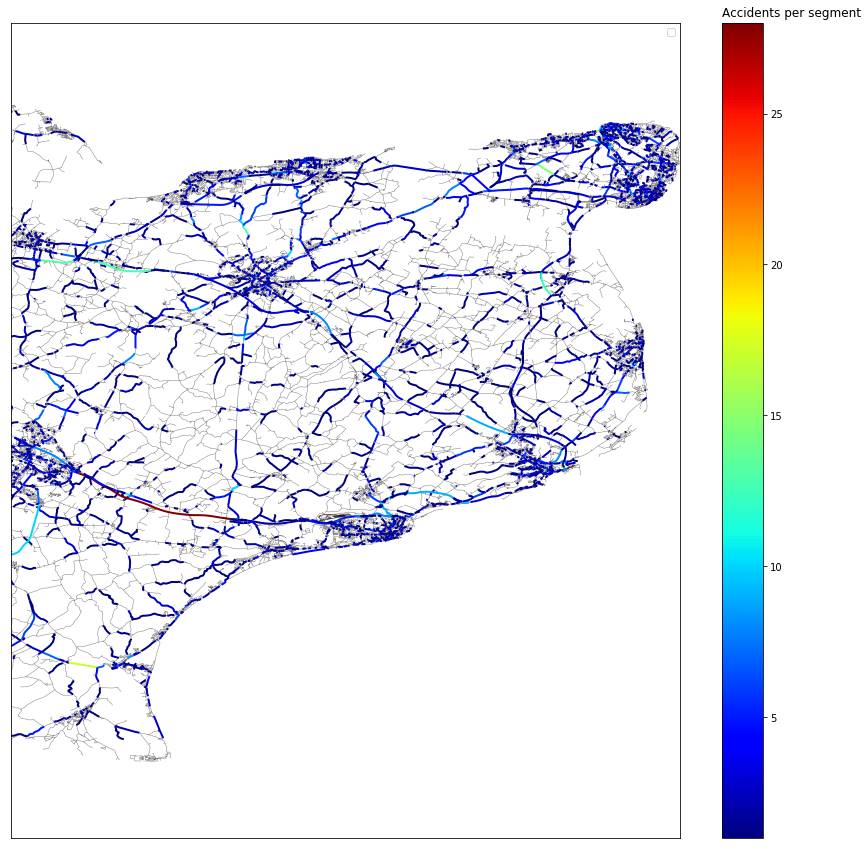

In [60]:
cmap_1 = "jet"
fig, ax = plt.subplots(1, figsize=(15, 15))
#ax.set_facecolor('black')
no_accidents.plot(ax=ax,column='accidents_per_segment',alpha=0.5,linewidth=0.5,cmap="hot")
accidents.plot(ax=ax,column='accidents_per_segment',alpha=1,linewidth=2,cmap=cmap_1)
ax.set_xlim((600000, 640000))
ax.set_ylim((110000, 180000))
ax.set_yticks([])
ax.set_xticks([])

plt.legend(loc='best')

sm = plt.cm.ScalarMappable(cmap=cmap_1, norm=plt.Normalize(vmin=min(accidents['accidents_per_segment']), vmax=
                                                          max(accidents['accidents_per_segment'])))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.set_title('Accidents per segment',loc='left')

On this map, segments with no accidents are colored black, while those segments that did experience accidents are colored according to the number they experienced. Once this analysis has been done for the entire dataset, each accident will be associated with a road segment. We can also use GIS software to determine features of each road segment, such as its sinuosity and proximity to signs/junctions etc. To build negative examples in the training set, we will randomly perturb the time and segment information as described in the proposal document